In [1]:
from structured.DataRetriever import DataRetriever
import numpy as np
import pandas as pd

dt = DataRetriever("D:/Descargas/i2ascii-files/i2ascii-files/", 100)
dt.set_target(['m_elev','m_az'])
dt.set_selected_hits(10)
target, data = dt.load_data(
    get_sel_events = True,
    filter_bbfit_null = False,
    get_bbfit_data = False,
    get_aafit_data = False
)

In [ ]:
data.columns

In [2]:
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor

# Métricas de evaluación que se utilizarán. No nos preocupamos en negarlas debido a que no se utilizarán de forma automática,
# solo las visualizaremos
metrics_dict = {
  'MAE': metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'E_VARIANCE': metrics.explained_variance_score
}

algorithms_dict = {}

# Algoritmo 1: Estandarización + OLS
#steps = [('standardization', StandardScaler()),
#         ('elastic', ElasticNet())]
#algorithms_dict['STD_ELASTIC'] = Pipeline(steps)

# Algoritmo 2: Estandarización + KNN
#steps = [('standardization', StandardScaler()),
#         ('laso', Lasso())]
#algorithms_dict['STD_LASO'] = Pipeline(steps)

# Algoritmo 2: Estandarización + KNN
#steps = [('standardization', StandardScaler()),
#         ('knn', KNeighborsRegressor(n_neighbors=10))]
#algorithms_dict['STD_KNN'] = Pipeline(steps)

# Algoritmo 3: Estandarización + RandomForest
steps = [('standardization', StandardScaler()),
         ('rforest', RandomForestRegressor(n_estimators=10))]
algorithms_dict['STD_RF'] = Pipeline(steps)

# Algoritmo 3: Estandarización + RandomForest
#steps = [('standardization', StandardScaler()),
#         ('gbr', GradientBoostingRegressor())]
#algorithms_dict['STD_GBR'] = Pipeline(steps)

# Algoritmo 3: Estandarización + PCA + RandomForest
#steps = [('standardization', StandardScaler()),
#         ('pca', PCA(n_components=0.95)),
#         ('rforest', RandomForestRegressor())]
#algorithms_dict['STD_RF_PCA'] = Pipeline(steps)

In [ ]:
df.tail

In [ ]:
from sklearn.ensemble import IsolationForest

#n_samples = df.count()
#outliers_fraction = 0.1
#n_outliers = int(outliers_fraction * n_samples)
#n_inliers = n_samples - n_outliers

# fit the model
clf = IsolationForest(behaviour='new',n_jobs=4,
                      random_state=50, contamination='auto')

outliers_mask = clf.fit(data).predict(data)

In [ ]:
outliers_mask2 = outliers_mask
num_neg = (outliers_mask2 == -1).sum()
print(num_neg)
num_pos = (outliers_mask2 == 1).sum()
print(num_pos)

In [ ]:
data_filtered = data[outliers_mask > 0]

In [ ]:
target_filtered = target[outliers_mask > 0]

In [ ]:
# Se realizan las 6 predicciones y se almacenan en un diccionario con nombres descriptivos 
y_pred_dict = {}
for alg_name, alg in algorithms_dict.items():
    y_pred_dict[alg_name] = cross_val_predict(alg, data_filtered, target_filtered, n_jobs=4,
                                                              cv=KFold(n_splits=5, random_state=50))

In [3]:
# Se realizan las 6 predicciones y se almacenan en un diccionario con nombres descriptivos 
y_pred_dict = {}
for alg_name, alg in algorithms_dict.items():
    y_pred_dict[alg_name] = cross_val_predict(alg, data, target, n_jobs=6,
                                                              cv=KFold(n_splits=5, random_state=100))

In [4]:
# En lugar de importar la función del script utilizado en clase, se reimplementa con ligeras variaciones para
# adaptarse a las necesidades del ejercicio
def grafica_real_vs_pred_mod(y_true, y_pred, evaluated_metrics, algorithm_name):
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Real class value')
    ax.set_ylabel('Prediction')
    title = algorithm_name + '\n'
    for name, result in evaluated_metrics.items():
        title += name + ': ' + str(round(result, 3)) + ' '
        
    plt.title(title)
    plt.show()

In [ ]:
# TEST 1
# Se evaluan las predicciones y se representan al estilo visto en clase
evaluated = {}
for name, prediction in y_pred_dict.items():
    for metric_name, metric in metrics_dict.items():
        evaluated[metric_name] = metric(target_filtered, prediction)

    grafica_real_vs_pred_mod(target_filtered, prediction, evaluated, name)

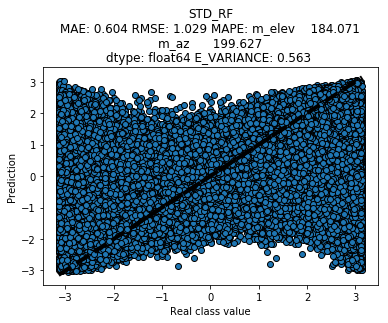

In [5]:
# TEST 1
# Se evaluan las predicciones y se representan al estilo visto en clase
evaluated = {}
for name, prediction in y_pred_dict.items():
    for metric_name, metric in metrics_dict.items():
        evaluated[metric_name] = metric(target, prediction)

    grafica_real_vs_pred_mod(target, prediction, evaluated, name)

In [ ]:
metrics_dict['MAE'](data[['bbfit_elev','bbfit_az']][outliers_mask > 0], target_filtered)
#metrics_dict['MAE'](data[['bbfit_az']], target2)
metrics_dict['RMSE'](data[['bbfit_elev','bbfit_az']][outliers_mask > 0], target_filtered)
#metrics_dict['RMSE'](data[['bbfit_az']], target2)

In [ ]:
print(metrics_dict['MAE'](data[['bbfit_elev','bbfit_az']], target))
#metrics_dict['MAE'](data[['bbfit_az']], target2)
print(metrics_dict['RMSE'](data[['bbfit_elev','bbfit_az']], target))
#metrics_dict['RMSE'](data[['bbfit_az']], target2)

In [ ]:
visual_comp = target.join(pd.DataFrame(data[['bbfit_elev','bbfit_az']]))

In [ ]:
y_pred_dict['STD_RF']

In [ ]:
visual_comp = visual_comp.join(pd.DataFrame(y_pred_dict['STD_RF']), rsuffix='pred')

visual_comp